## Import Libraries

---



In [ ]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

#misc libraries
import random
import time
import os
import re

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.2.1
NumPy version: 1.18.3
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.1
tensorflow version: 2.1.0
-------------------------


In [ ]:
#Deep Learning Tools
from tensorflow.keras import models, layers, regularizers
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

#Common Model Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
from sklearn import feature_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, precision_recall_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
import seaborn as sns
import pandas_profiling as pp
from sklearn.inspection import permutation_importance

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set()
#pylab.rcParams['figure.figsize'] = 12,8

Using TensorFlow backend.


## Self Def Functions

In [ ]:
def Sort_Columns(ColNames):
  Parameter = list(map(lambda x: x.rsplit('_',1)[1] if len(x.rsplit('_',1))>1 else x,
                       ColNames))
  Sorted_Tuple = sorted(zip(Parameter,ColNames),key = lambda x:x[0])
  return [col for (index,col) in Sorted_Tuple]

In [ ]:
def Pretty_Print(ColNames,FeaturesName,Print_Col = 3, length = 100):
  ##Self Define ColName Print Format
  def Pretty_ColName(ColName):
    ColName_ = ColName.rsplit('_',1)
    ColName_ = ColName_[::-1]

    if len(ColName_)>1:
      Number = ColName_[0]

      if re.match(r'[A-Z]+',Number):
        Number = ' '*5
        ColName_[1] = ColName
      elif re.match(r'[0-9]+[A-Z]',Number):
        Number = Number.rjust(5)
      else:
        Number = Number.rjust(4).ljust(5)
      
      ColName_[0] = Number

    else:
      ColName_.insert(0,' '*5)
    
    ColName_[1] = ColName_[1].ljust(25)

    return '{} : {}'.format(*ColName_)
  ##
  ColNames = Sort_Columns(ColNames)

  Print_List = []
  index = 0
  while index <len(ColNames):
    Print_List.append(ColNames[index:index+Print_Col])
    index += Print_Col

  print('-'*length)
  print(FeaturesName.center(length))
  print('-'*length)
  print('\n'.join([' '.join([Pretty_ColName(item) for item in row]) for row in Print_List]))

In [ ]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
 
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

## Import the Data

---



In [ ]:
#Dataframe for collecting data number been used in each year
Data_number = pd.DataFrame(columns=['raw_data', 'current_year', 'clean_useless', 'final'],
                           index=range(2019,1991,-1))

In [ ]:
file_root = 'D:\\ShaoTing\\data\\raw\\'
start_year = 1992
end_year = 2019

file_list = os.listdir(file_root)
file_list = [filename for filename in file_list if filename.endswith('.csv')]
file_list = np.sort(file_list)[::-1]
file_dict = {}
for filename in file_list:
  Year = int(filename.strip('.csv').strip('raw_'))
  if Year in range(end_year, start_year-1,-1):
    df = pd.read_csv(file_root+filename, low_memory = False, encoding='latin-1')
    
    if 'ï»¿STATE_CODE_001' in df.columns.values:
      df.rename(columns={'ï»¿STATE_CODE_001':'STATE_CODE_001'}, inplace = True)
    
    file_dict[Year] = df
     
# Check Common columns
flag = 0
for data in file_dict.values():
  if flag==0:
    Common_Column = data.columns
    flag = 1
  else:
    Common_Column = Common_Column.intersection(data.columns)

for Year,data in file_dict.items():
    print('-'*25)
    print(Year)
    file_dict[Year] = data[Common_Column]
    print('Size: {}'.format(file_dict[Year].shape))
    Data_number.loc[Year, 'raw_data'] = file_dict[Year].shape[0]


-------------------------
2019
Size: (617084, 132)
-------------------------
2018
Size: (616096, 132)
-------------------------
2017
Size: (615002, 132)
-------------------------
2016
Size: (614387, 132)
-------------------------
2015
Size: (611845, 132)
-------------------------
2014
Size: (610749, 132)
-------------------------
2013
Size: (607751, 132)
-------------------------
2012
Size: (607380, 132)
-------------------------
2011
Size: (605103, 132)
-------------------------
2010
Size: (604493, 132)
-------------------------
2009
Size: (713115, 132)
-------------------------
2008
Size: (717822, 132)
-------------------------
2007
Size: (715434, 132)
-------------------------
2006
Size: (709613, 132)
-------------------------
2005
Size: (706753, 132)
-------------------------
2004
Size: (703534, 132)
-------------------------
2003
Size: (699903, 132)
-------------------------
2002
Size: (697005, 132)
-------------------------
2001
Size: (694940, 132)
-------------------------
2000


In [ ]:
#Keep data which inspection year equals to file year

for Year,df in file_dict.items():
    print('-'*25)
    print(Year)
    print('Before Cleaning: {}'.format(df.shape))

    df = df[~df['DATE_OF_INSPECT_090'].isna()]
    df = df.loc[df.DATE_OF_INSPECT_090 != 'N00']
    df = df.loc[df.DATE_OF_INSPECT_090 != 'Y06']
    df = df.loc[df.DATE_OF_INSPECT_090 != 'N  ']

    df['DATE_OF_INSPECT_090'] = df['DATE_OF_INSPECT_090'].apply(lambda x: int(x)%100)
    
    if Year == 2000:
        this_year = 0
        last_year = 99
    else:
        this_year = Year%100
        last_year = this_year - 1

    df_this_year = df.loc[df.DATE_OF_INSPECT_090 == this_year].reset_index(drop = True)
  
    if Year == end_year:
        file_dict[Year] = df_this_year
        df_last_year = df.loc[df.DATE_OF_INSPECT_090 == last_year].reset_index(drop = True)

    else:
        file_dict[Year] = pd.concat([df_this_year, df_last_year], ignore_index=True, sort=False)
        df_last_year = df.loc[df.DATE_OF_INSPECT_090 == last_year].reset_index(drop = True)
  
    print(' After Cleaning: {}'.format(file_dict[Year].shape))

-------------------------
2019
Before Cleaning: (617084, 132)
 After Cleaning: (33326, 132)
-------------------------
2018
Before Cleaning: (616096, 132)
 After Cleaning: (356132, 132)
-------------------------
2017
Before Cleaning: (615002, 132)
 After Cleaning: (364074, 132)
-------------------------
2016
Before Cleaning: (614387, 132)
 After Cleaning: (371617, 132)
-------------------------
2015
Before Cleaning: (611845, 132)
 After Cleaning: (365432, 132)
-------------------------
2014
Before Cleaning: (610749, 132)
 After Cleaning: (378327, 132)
-------------------------
2013
Before Cleaning: (607751, 132)
 After Cleaning: (372151, 132)
-------------------------
2012
Before Cleaning: (607380, 132)
 After Cleaning: (387441, 132)
-------------------------
2011
Before Cleaning: (605103, 132)
 After Cleaning: (374959, 132)
-------------------------
2010
Before Cleaning: (604493, 132)
 After Cleaning: (383180, 132)
-------------------------
2009
Before Cleaning: (713115, 132)
 After Cl

In [ ]:
# Drop duplicates
for Year,df in file_dict.items():
    print('-'*25)
    print(Year)
    print('Before Cleaning: {}'.format(df.shape))
    
    
    df['STATE_CODE_001'] = df['STATE_CODE_001'].apply(int).apply(str).apply(lambda x: x.strip())
    df['STRUCTURE_NUMBER_008'] = df['STRUCTURE_NUMBER_008'].apply(str).apply(lambda x: x.strip())
    
    df.drop_duplicates(subset=['STATE_CODE_001', 'STRUCTURE_NUMBER_008'], keep='first', inplace = True)
    df = df.reset_index(drop = True)
    
    file_dict[Year] = df

    print(' After Cleaning: {}'.format(file_dict[Year].shape))
    Data_number.loc[Year, 'current_year'] = file_dict[Year].shape[0]

-------------------------
2019
Before Cleaning: (33326, 132)
 After Cleaning: (30770, 132)
-------------------------
2018
Before Cleaning: (356132, 132)
 After Cleaning: (285772, 132)
-------------------------
2017
Before Cleaning: (364074, 132)
 After Cleaning: (286320, 132)
-------------------------
2016
Before Cleaning: (371617, 132)
 After Cleaning: (269674, 132)
-------------------------
2015
Before Cleaning: (365432, 132)
 After Cleaning: (286768, 132)
-------------------------
2014
Before Cleaning: (378327, 132)
 After Cleaning: (290232, 132)
-------------------------
2013
Before Cleaning: (372151, 132)
 After Cleaning: (323582, 132)
-------------------------
2012
Before Cleaning: (387441, 132)
 After Cleaning: (328807, 132)
-------------------------
2011
Before Cleaning: (374959, 132)
 After Cleaning: (318823, 132)
-------------------------
2010
Before Cleaning: (383180, 132)
 After Cleaning: (332612, 132)
-------------------------
2009
Before Cleaning: (381608, 132)
 After Cle

## Data Cleaning : Correcting, Completing, Creating and Converting

---

### Data Cleaning: Correcting

In [ ]:
Non_Useable_feature = ['HIGHWAY_DISTRICT_002','COUNTY_CODE_003',
                       'PLACE_CODE_004',#'RECORD_TYPE_005A',#Always equal 1
                       'ROUTE_NUMBER_005D','FEATURES_DESC_006A',
                       'CRITICAL_FACILITY_006B','FACILITY_CARRIED_007',
                       'LOCATION_009','LRS_INV_ROUTE_013A','SUBROUTE_NO_013B',
                       'OWNER_022',#'DATE_OF_INSPECT_90',
                       'FRACTURE_LAST_DATE_093A','UNDWATER_LAST_DATE_093B','SPEC_LAST_DATE_093C',
                       'YEAR_OF_IMP_097','OTHER_STATE_CODE_098A','OTHER_STATE_PCNT_098B',
                       'OTHR_STATE_STRUC_NO_099','YEAR_OF_FUTURE_ADT_115',
                       'FED_AGENCY','DATE_LAST_UPDATE','TYPE_LAST_UPDATE','DEDUCT_CODE',
                       'REMARKS','PROGRAM_CODE','PROJ_NO', 'PROJ_SUFFIX', 'NBI_TYPE_OF_IMP',
                       'DTL_TYPE_OF_IMP','SPECIAL_CODE', 'STEP_CODE', 'STATUS_WITH_10YR_RULE',
                       'SUFFICIENCY_ASTERC', 'SUFFICIENCY_RATING', 'STATUS_NO_10YR_RULE', 'CAT10'
                       ]

Common_Column = [col for col in Common_Column if col not in Non_Useable_feature]
Pretty_Print(Non_Useable_feature,'Non Useable Features',2,62)

--------------------------------------------------------------
                     Non Useable Features                     
--------------------------------------------------------------
 002  : HIGHWAY_DISTRICT           003  : COUNTY_CODE              
 004  : PLACE_CODE                 005D : ROUTE_NUMBER             
 006A : FEATURES_DESC              006B : CRITICAL_FACILITY        
 007  : FACILITY_CARRIED           009  : LOCATION                 
 013A : LRS_INV_ROUTE              013B : SUBROUTE_NO              
 022  : OWNER                      093A : FRACTURE_LAST_DATE       
 093B : UNDWATER_LAST_DATE         093C : SPEC_LAST_DATE           
 097  : YEAR_OF_IMP                098A : OTHER_STATE_CODE         
 098B : OTHER_STATE_PCNT           099  : OTHR_STATE_STRUC_NO      
 115  : YEAR_OF_FUTURE_ADT              : FED_AGENCY               
      : SUFFICIENCY_ASTERC              : CAT10                    
      : DEDUCT_CODE                     : PROGRAM_CODE         

In [ ]:
# Clean Useless Score
for Year,data in file_dict.items():
    print('-'*25)
    print(Year)
    print('Before Cleaning: {}'.format(data.shape))
    data = data[~data['YEAR_BUILT_027'].isna()]
    data = data[~data['DECK_COND_058'].isna()]
    data = data[~data['LAT_016'].isna()]
    data = data[~data['LONG_017'].isna()]
    data = data.loc[~data['YEAR_RECONSTRUCTED_106'].isna()]
    
    data = data.reset_index(drop = True)

    #Constrain to useful features
    data = data[Common_Column]

    file_dict[Year] = data[data['DECK_COND_058']!= 'N']

    print(' After Cleaning: {}'.format(file_dict[Year].shape))
    Data_number.loc[Year, 'clean_useless'] = file_dict[Year].shape[0]

-------------------------
2019
Before Cleaning: (30770, 132)
 After Cleaning: (21352, 99)
-------------------------
2018
Before Cleaning: (285772, 132)
 After Cleaning: (206166, 99)
-------------------------
2017
Before Cleaning: (286320, 132)
 After Cleaning: (203764, 99)
-------------------------
2016
Before Cleaning: (269674, 132)
 After Cleaning: (201415, 99)
-------------------------
2015
Before Cleaning: (286768, 132)
 After Cleaning: (209703, 99)
-------------------------
2014
Before Cleaning: (290232, 132)
 After Cleaning: (215876, 99)
-------------------------
2013
Before Cleaning: (323582, 132)
 After Cleaning: (237095, 99)
-------------------------
2012
Before Cleaning: (328807, 132)
 After Cleaning: (249843, 99)
-------------------------
2011
Before Cleaning: (318823, 132)
 After Cleaning: (244793, 99)
-------------------------
2010
Before Cleaning: (332612, 132)
 After Cleaning: (258032, 99)
-------------------------
2009
Before Cleaning: (318708, 132)
 After Cleaning: (24

### Cleaning Data: Completing

Replace char to int

In [ ]:
for Year,df in file_dict.items():
  
    for col in ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'CULVERT_COND_062']:
        df[col] = df[col].replace('N', -1)

    for col in ['STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 'UNDCLRENCE_EVAL_069', 'WATERWAY_EVAL_071', 'APPR_ROAD_EVAL_072']:
        df[col] = df[col].replace(['*','N'],0)

    df.NATIONAL_NETWORK_110 = df.NATIONAL_NETWORK_110.replace('Y',1)
    df.SCOUR_CRITICAL_113   = df.SCOUR_CRITICAL_113.replace(['N','T','U'],[9, 4.5, 1.5])

    file_dict[Year] = df

Check for NaNs

In [ ]:
pd.set_option('display.max_rows', 132)
missing_threshold = 0.5

view_table=pd.DataFrame({'Col':Common_Column})
view_table = view_table.set_index('Col')
for Year,data in file_dict.items():
  view_table[Year] = data[view_table.index].isna().sum()/data.shape[0]


view_table = view_table[(view_table.T != 0).any()]
view_table.sort_values([col for col in file_dict.keys()],ascending= False)

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
Col,,,,,,,,,,,,,,,,,,,,,
TEMP_STRUCTURE_103,0.992600,0.993573,0.992216,0.992657,0.992561,0.991634,0.990021,0.991575,0.989326,0.990784,...,0.992889,0.993609,0.993454,0.994593,0.993139,0.994378,0.993327,0.994626,0.993866,0.994306
PIER_PROTECTION_111,0.836268,0.852371,0.848226,0.873267,0.839888,0.881664,0.862279,0.874565,0.866863,0.883542,...,0.923203,0.934433,0.937374,0.941142,0.939951,0.945894,0.927232,0.940959,0.935990,0.931047
WORK_DONE_BY_075B,0.629918,0.639019,0.614829,0.647678,0.636834,0.631274,0.597891,0.607001,0.593166,0.606386,...,0.522618,0.533024,0.518578,0.528605,0.514727,0.496425,0.514482,0.494014,0.486958,0.456933
WORK_PROPOSED_075A,0.627904,0.633945,0.609185,0.645617,0.633219,0.631020,0.594243,0.604360,0.591345,0.604479,...,0.539238,0.549165,0.519619,0.529461,0.516125,0.497179,0.515292,0.494426,0.486804,0.457216
MIN_NAV_CLR_MT_116,0.570017,0.473361,0.488025,0.525467,0.526058,0.557899,0.666817,0.669196,0.689595,0.662848,...,0.695043,0.740952,0.715011,0.766368,0.743704,0.829726,0.847944,0.866977,0.851304,0.850617
TOTAL_IMP_COST_096,0.329384,0.245157,0.246236,0.250135,0.256324,0.284788,0.374976,0.353646,0.347596,0.327277,...,0.240782,0.248621,0.226835,0.215908,0.198827,0.210151,0.238814,0.224137,0.237159,0.226739
ROADWAY_IMP_COST_095,0.322078,0.228772,0.231012,0.231011,0.246134,0.261900,0.369540,0.352493,0.343049,0.332540,...,0.282006,0.281279,0.262144,0.249927,0.268915,0.278806,0.307131,0.293457,0.300138,0.286809
BRIDGE_IMP_COST_094,0.307887,0.217412,0.219268,0.218941,0.230750,0.249009,0.356752,0.339929,0.329164,0.319480,...,0.265547,0.255549,0.234582,0.223963,0.250400,0.258506,0.283275,0.269492,0.271494,0.258144
IMP_LEN_MT_076,0.305451,0.321033,0.326019,0.329380,0.335718,0.302683,0.294051,0.278643,0.273460,0.242032,...,0.223991,0.254548,0.223758,0.239024,0.255405,0.268462,0.271324,0.253532,0.270634,0.253646


Fill NaNs

In [ ]:
Missing = list(view_table.loc[np.max(view_table.T) > missing_threshold].index)

ToCommon = ['ROUTE_PREFIX_005B','SERVICE_LEVEL_005C','DIRECTION_005E','MIN_VERT_CLR_010','BASE_HWY_NETWORK_012',
            'DETOUR_KILOS_019','TOLL_020','MAINTENANCE_021','FUNCTIONAL_CLASS_026','TRAFFIC_LANES_ON_028A',
            'TRAFFIC_LANES_UND_028B','YEAR_ADT_030',
            'APPR_WIDTH_MT_032','MEDIAN_CODE_033','DEGREES_SKEW_034','STRUCTURE_FLARED_035',
            'HISTORY_037','NAVIGATION_038','OPEN_CLOSED_POSTED_041','SERVICE_ON_042A','SERVICE_UND_042B',
            'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 
            'APPR_KIND_044A','APPR_TYPE_044B','HORR_CLR_MT_047','MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049',
            'LEFT_CURB_MT_050A','RIGHT_CURB_MT_050B','DECK_WIDTH_MT_052',
            'VERT_CLR_OVER_MT_053','VERT_CLR_UND_REF_054A','VERT_CLR_UND_054B','LAT_UND_REF_055A','LAT_UND_MT_055B',
            'LEFT_LAT_UND_MT_056','OPR_RATING_METH_063','OPERATING_RATING_064','INV_RATING_METH_065','INVENTORY_RATING_066',
            'POSTING_EVAL_070','WATERWAY_EVAL_071','APPR_ROAD_EVAL_072','STRAHNET_HIGHWAY_100','TRAFFIC_DIRECTION_102',
            'HIGHWAY_SYSTEM_104','FEDERAL_LANDS_105','NATIONAL_NETWORK_110','BRIDGE_LEN_IND_112','SCOUR_CRITICAL_113',

            'DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060','CHANNEL_COND_061',
            'CULVERT_COND_062',
            'STRUCTURAL_EVAL_067','DECK_GEOMETRY_EVAL_068','UNDCLRENCE_EVAL_069'
]

ToZero = ['DESIGN_LOAD_031','NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040','MAIN_UNIT_SPANS_045','APPR_SPANS_046',
          'IMP_LEN_MT_076','INSPECT_FREQ_MONTHS_091','BRIDGE_IMP_COST_094','ROADWAY_IMP_COST_095','TOTAL_IMP_COST_096'
]

ToNoData = ['RAILINGS_036A','TRANSITIONS_036B','APPR_RAIL_036C','APPR_RAIL_END_036D','NAVIGATION_038',
            'FRACTURE_092A','UNDWATER_LOOK_SEE_092B','SPEC_INSPECT_092C','PARALLEL_STRUCTURE_101','DECK_STRUCTURE_TYPE_107',
            'SURFACE_TYPE_108A','MEMBRANE_TYPE_108B','DECK_PROTECTION_108C'
]

ToMedian = ['KILOPOINT_011','ADT_029','ROADWAY_WIDTH_MT_051','PERCENT_ADT_TRUCK_109','FUTURE_ADT_114']


In [ ]:
#Display
Pretty_Print(Missing, 'Missing rate > 0.5',2,62)
for (name,ColNames) in zip(['Common','Zero','No Data','Median'],
                           [ToCommon,ToZero,ToNoData,ToMedian]):
  
  Pretty_Print(ColNames,'Complete NaNs to {}'.format(name))

--------------------------------------------------------------
                      Missing rate > 0.5                      
--------------------------------------------------------------
 011  : KILOPOINT                  012  : BASE_HWY_NETWORK         
 063  : OPR_RATING_METH            065  : INV_RATING_METH          
 075A : WORK_PROPOSED              075B : WORK_DONE_BY             
 103  : TEMP_STRUCTURE             105  : FEDERAL_LANDS            
 111  : PIER_PROTECTION            116  : MIN_NAV_CLR_MT           
--------------------------------------------------------------
                   Complete NaNs to Common                    
--------------------------------------------------------------
 005B : ROUTE_PREFIX               005C : SERVICE_LEVEL            
 005E : DIRECTION                  010  : MIN_VERT_CLR             
 012  : BASE_HWY_NETWORK           019  : DETOUR_KILOS             
 020  : TOLL                       021  : MAINTENANCE              
 026  : FU

In [ ]:
#fill Nans
for Year,df in file_dict.items():
  
    Common_Column = [col for col in Common_Column if col not in Missing]
    
    for col in Common_Column:
        
        if col in ToCommon:
            df[col] = df[col].fillna(df[col].mode()[0]) #mode: most-frequent
        if col in ToZero:
            df[col] = df[col].fillna(0)
        if col in ToNoData:
            df[col] = df[col].fillna('N')
        if col in ToMedian:
            df[col] = df[col].fillna(df[col].median())

    file_dict[Year] = df

pd.set_option('display.max_rows', 134)

view_table_after=pd.DataFrame({'Col':Common_Column})
view_table_after = view_table_after.set_index('Col')
for Year,data in file_dict.items():
    view_table_after[Year] = data[view_table_after.index].isna().sum()

view_table_after['NaN'] = (view_table_after.T != 0).any()*1
view_table_after.sort_values([col for col in file_dict.keys()],ascending= False)

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2000,1999,1998,1997,1996,1995,1994,1993,1992,NaN
Col,,,,,,,,,,,,,,,,,,,,,
STATE_CODE_001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STRUCTURE_NUMBER_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RECORD_TYPE_005A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ROUTE_PREFIX_005B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SERVICE_LEVEL_005C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DIRECTION_005E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIN_VERT_CLR_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LAT_016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LONG_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check dtype

In [ ]:
pd.set_option('display.max_rows', 132)
view_table=pd.DataFrame({'Col':Common_Column})
view_table = view_table.set_index('Col')
for Year,data in file_dict.items():
  view_table[Year] = data[view_table.index].dtypes


#view_table = view_table[(view_table.T != 0).any()]
view_table.sort_values([col for col in file_dict.keys()],ascending= False)

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
Col,,,,,,,,,,,,,,,,,,,,,
STATE_CODE_001,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
STRUCTURE_NUMBER_008,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
RAILINGS_036A,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
TRANSITIONS_036B,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
APPR_RAIL_036C,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
APPR_RAIL_END_036D,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
NAVIGATION_038,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
NAV_VERT_CLR_MT_039,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
OPEN_CLOSED_POSTED_041,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object


In [ ]:
ToInt = ['YEAR_BUILT_027','TRAFFIC_LANES_ON_028A',
         'TRAFFIC_LANES_UND_028B','YEAR_ADT_030','MAIN_UNIT_SPANS_045','APPR_SPANS_046','INSPECT_FREQ_MONTHS_091','YEAR_RECONSTRUCTED_106',

         #Still trying
         'SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060','CHANNEL_COND_061','CULVERT_COND_062','STRUCTURAL_EVAL_067',
         'DECK_GEOMETRY_EVAL_068','UNDCLRENCE_EVAL_069','POSTING_EVAL_070','WATERWAY_EVAL_071', 'APPR_ROAD_EVAL_072','SCOUR_CRITICAL_113',
         
         'DATE_OF_INSPECT_090'
]

ToIntStr = ['STATE_CODE_001','RECORD_TYPE_005A','ROUTE_PREFIX_005B','BASE_HWY_NETWORK_012',
            'TOLL_020','MAINTENANCE_021','FUNCTIONAL_CLASS_026',
            'MEDIAN_CODE_033','STRUCTURE_FLARED_035','HISTORY_037',
            'SERVICE_ON_042A','SERVICE_UND_042B','STRUCTURE_KIND_043A',
            'STRUCTURE_TYPE_043B','APPR_KIND_044A','APPR_TYPE_044B',
            'STRAHNET_HIGHWAY_100','TRAFFIC_DIRECTION_102','HIGHWAY_SYSTEM_104',
            'FEDERAL_LANDS_105'
]

ToStr = ['SERVICE_LEVEL_005C','DIRECTION_005E','STRUCTURE_NUMBER_008','DESIGN_LOAD_031',
         'RAILINGS_036A','TRANSITIONS_036B','APPR_RAIL_036C','APPR_RAIL_END_036D',
         'NAVIGATION_038','OPEN_CLOSED_POSTED_041','VERT_CLR_UND_REF_054A','LAT_UND_REF_055A','OPR_RATING_METH_063','INV_RATING_METH_065',
         'FRACTURE_092A','UNDWATER_LOOK_SEE_092B','SPEC_INSPECT_092C','PARALLEL_STRUCTURE_101',
         'DECK_STRUCTURE_TYPE_107','SURFACE_TYPE_108A','MEMBRANE_TYPE_108B','DECK_PROTECTION_108C',
         'NATIONAL_NETWORK_110','BRIDGE_LEN_IND_112',
]

ToFloat = ['MIN_VERT_CLR_010','KILOPOINT_011','DETOUR_KILOS_019','ADT_029','APPR_WIDTH_MT_032',
           'DEGREES_SKEW_034','NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040','HORR_CLR_MT_047','MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049',
           'LEFT_CURB_MT_050A','RIGHT_CURB_MT_050B','ROADWAY_WIDTH_MT_051','DECK_WIDTH_MT_052','VERT_CLR_OVER_MT_053','VERT_CLR_UND_054B',
           'LAT_UND_MT_055B','LEFT_LAT_UND_MT_056','DECK_COND_058','OPERATING_RATING_064','INVENTORY_RATING_066',
           'IMP_LEN_MT_076','BRIDGE_IMP_COST_094','ROADWAY_IMP_COST_095','TOTAL_IMP_COST_096','PERCENT_ADT_TRUCK_109',
           'FUTURE_ADT_114']

##
for Year,df in file_dict.items():

    ##Typo
    df = df[df.DIRECTION_005E!='ï¼³']
    df = df.loc[df.INSPECT_FREQ_MONTHS_091 != 'N00']
        
    for col in Common_Column:
        
        if col in ToInt:
            df[col] = df[col].apply(int)
        if col in ToIntStr:
            df[col] = df[col].apply(int).apply(str).apply(lambda x: x.strip())
        if col in ToStr:
            df[col] = df[col].apply(str).apply(lambda x: x.strip())
        if col in ToFloat:
            df[col] = df[col].apply(float)

    file_dict[Year] = df

#Display
for (name,ColNames) in zip(['Int','IntStr','Str','Float'],
                           [ToInt,ToIntStr,ToStr,ToFloat]):
  
  Pretty_Print(ColNames,'Convert dtype to {}'.format(name))

In [ ]:
getIndexes(file_dict[2009][ToIntStr], 'N')

[]

### Cleaning Data: Creating

In [ ]:
#Fixed Some features 

for Year, df in file_dict.items():
        
    if col in ['LAT_016', 'LONG_017']:
        df[col] = df[col].apply(lambda x: int(x/1000000)*60 + int(x/10000))

    if col in ['FRACTURE_092A', 'SPEC_INSPECT_092C']:
        df[col] = df[col].apply(lambda x: 1 if x.startswith('Y') else 0)

    df['TOTAL_IMP_COST_096'] = df['TOTAL_IMP_COST_096']-df['BRIDGE_IMP_COST_094']-df['ROADWAY_IMP_COST_095']
    df['Age'] = Year - df[['YEAR_BUILT_027','YEAR_RECONSTRUCTED_106']].max(axis=1)
    df['YEAR_RECONSTRUCTED_106'] = df['YEAR_RECONSTRUCTED_106'].apply(lambda x: 1 if x > 0 else 0)
    df = df.drop('YEAR_BUILT_027', 1)

    file_dict[Year] = df

##
Common_Column.remove('YEAR_BUILT_027')
Common_Column.append('Age')

In [ ]:
#Remove outlier

for Year, df in file_dict.items():
    print('-'*25)
    print(Year)
    print('Before Cleaning: {}'.format(df.shape))

    df = df[df.Age > 0]

    idx_set = set()
    for ii in range(1,10):
        temp = df.loc[df.DECK_COND_058.astype('int') == ii]
        if temp.shape[0] > 5:
            y, l = sp.stats.boxcox(temp.Age)
            Q1 = np.quantile(y, 0.25)
            Q3 = np.quantile(y, 0.75)
            IQR = Q3 - Q1
            indexNames = temp[ (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR)) ].index
            idx_set = idx_set.union(set(indexNames.values))

    df = df.drop(idx_set).reset_index(drop = True)

    print(' After Cleaning: {}'.format(df.shape))
    print('Number of removal: ', len(idx_set))
    file_dict[Year] = df
    Data_number.loc[Year, 'final'] = file_dict[Year].shape[0]

-------------------------
2019
Before Cleaning: (21352, 99)
 After Cleaning: (21232, 99)
Number of removal:  67
-------------------------
2018
Before Cleaning: (206166, 99)
 After Cleaning: (203158, 99)
Number of removal:  727
-------------------------
2017
Before Cleaning: (203764, 99)
 After Cleaning: (200723, 99)
Number of removal:  644
-------------------------
2016
Before Cleaning: (201415, 99)
 After Cleaning: (198350, 99)
Number of removal:  840
-------------------------
2015
Before Cleaning: (209703, 99)
 After Cleaning: (206276, 99)
Number of removal:  809
-------------------------
2014
Before Cleaning: (215875, 99)
 After Cleaning: (212669, 99)
Number of removal:  990
-------------------------
2013
Before Cleaning: (237095, 99)
 After Cleaning: (232976, 99)
Number of removal:  1098
-------------------------
2012
Before Cleaning: (249843, 99)
 After Cleaning: (244990, 99)
Number of removal:  1537
-------------------------
2011
Before Cleaning: (244793, 99)
 After Cleaning: (24

In [ ]:
#check for high single value proportion (above .9)
Prop_Table = pd.DataFrame()
Redundant_Col = []
for col in Common_Column:
  Dominate_Proportion = []
  for df in file_dict.values():
    Proportion = np.array(df[col].value_counts(normalize = True))[0]
    Dominate_Proportion.append(Proportion)
  if all([value>0.9 for value in Dominate_Proportion]):
    Redundant_Col.append(col)
    Added_Row = pd.DataFrame(data = [[str(round(prop*100,1))+'%' for prop in Dominate_Proportion]],
                             index = [col],
                             columns = [yr for yr in file_dict.keys()])
    Prop_Table = Prop_Table.append(Added_Row)

Pretty_Print(Redundant_Col,'High single value proportion (above .9)',2,62)

--------------------------------------------------------------
           High single value proportion (above .9)            
--------------------------------------------------------------
 005A : RECORD_TYPE                005E : DIRECTION                
 020  : TOLL                       033  : MEDIAN_CODE              
 035  : STRUCTURE_FLARED           039  : NAV_VERT_CLR_MT          
 040  : NAV_HORR_CLR_MT            044A : APPR_KIND                
 044B : APPR_TYPE                  046  : APPR_SPANS               
 062  : CULVERT_COND               090  : DATE_OF_INSPECT          
 112  : BRIDGE_LEN_IND           


In [ ]:
#Delete those columns
Common_Column = [col for col in Common_Column if col not in Prop_Table.index]

#Delete the Response Variable
ID = ['STATE_CODE_001', 'STRUCTURE_NUMBER_008']
Target = ['SUBSTRUCTURE_COND_060']

Common_Column = [col for col in Common_Column if col not in (ID+Target)]

### Cleaning Data: Converting

In [ ]:
Cat_Cols = [col for col in Common_Column if df[col].dtype in ['object','str']]

Numerical_Cols = [col for col in Common_Column if df[col].dtype not in ['object','str']]

Pretty_Print(Cat_Cols,'Categorial Response Number : {}'.format(len(Cat_Cols)),2,62)

Pretty_Print(Numerical_Cols,'Numerical Response Number : {}'.format(len(Numerical_Cols)),2,62)

--------------------------------------------------------------
               Categorial Response Number : 31                
--------------------------------------------------------------
 005B : ROUTE_PREFIX               005C : SERVICE_LEVEL            
 021  : MAINTENANCE                026  : FUNCTIONAL_CLASS         
 031  : DESIGN_LOAD                036A : RAILINGS                 
 036B : TRANSITIONS                036C : APPR_RAIL                
 036D : APPR_RAIL_END              037  : HISTORY                  
 038  : NAVIGATION                 041  : OPEN_CLOSED_POSTED       
 042A : SERVICE_ON                 042B : SERVICE_UND              
 043A : STRUCTURE_KIND             043B : STRUCTURE_TYPE           
 054A : VERT_CLR_UND_REF           055A : LAT_UND_REF              
 092A : FRACTURE                   092B : UNDWATER_LOOK_SEE        
 092C : SPEC_INSPECT               100  : STRAHNET_HIGHWAY         
 101  : PARALLEL_STRUCTURE         102  : TRAFFIC_DIRECTION    

In [ ]:
deficient_list = []
for Year,df in file_dict.items():
    df = df[ID + Target + Common_Column + ['DATE_OF_INSPECT_090']]
    #df[Numerical_Cols] = StandardScaler().fit_transform(df[Numerical_Cols])
    #df = pd.get_dummies(df, columns=Cat_Cols)
    
    df.STATE_CODE_001 = df.STATE_CODE_001.astype('int')
    df = df.sort_values(by=['STATE_CODE_001','STRUCTURE_NUMBER_008'],ascending=[True,True]).reset_index(drop = True)
    
    num_deficient = np.sum(df['SUBSTRUCTURE_COND_060'] <= 4)
    deficient_list.append(num_deficient)
    
    print('-'*25)
    print(Year)

    file_dict[Year] = df
    
    print('Size: {}'.format(file_dict[Year].shape))
    print('Deficient: ', num_deficient)

-------------------------
2019
Size: (21232, 77)
Deficient:  867
-------------------------
2018
Size: (203158, 77)
Deficient:  12680
-------------------------
2017
Size: (200723, 77)
Deficient:  13433
-------------------------
2016
Size: (198350, 77)
Deficient:  13039
-------------------------
2015
Size: (206276, 77)
Deficient:  13956
-------------------------
2014
Size: (212669, 77)
Deficient:  15086
-------------------------
2013
Size: (232976, 77)
Deficient:  17085
-------------------------
2012
Size: (244990, 77)
Deficient:  18719
-------------------------
2011
Size: (240230, 77)
Deficient:  19028
-------------------------
2010
Size: (252956, 77)
Deficient:  20149
-------------------------
2009
Size: (243642, 77)
Deficient:  19948
-------------------------
2008
Size: (254502, 77)
Deficient:  20571
-------------------------
2007
Size: (241604, 77)
Deficient:  20556
-------------------------
2006
Size: (241328, 77)
Deficient:  20093
-------------------------
2005
Size: (234343, 77)
D

## Save the dataframe

In [ ]:
save_root = 'D:\\ShaoTing\\data\\raw_SUB_all_features\\'
for Year,df in file_dict.items():
    f_name = 'final_' + str(Year) + '.csv'
    df.to_csv(save_root+f_name, index = False)

In [ ]:
Data_number['number_of_useless'] = Data_number.current_year - Data_number.clean_useless
Data_number['number_of_outlier'] = Data_number.clean_useless - Data_number.final
Data_number['number_of_deficient'] = deficient_list
Data_number.to_csv("D:\\ShaoTing\\result\\data_number_SUB.csv")
Data_number

,raw_data,current_year,clean_useless,final,number_of_useless,number_of_outlier,number_of_deficient
2019,617084,30770,21352,21232,9418,120,867
2018,616096,285772,206166,203158,79606,3008,12680
2017,615002,286320,203764,200723,82556,3041,13433
2016,614387,269674,201415,198350,68259,3065,13039
2015,611845,286768,209703,206276,77065,3427,13956
2014,610749,290232,215876,212669,74356,3207,15086
2013,607751,323582,237095,232976,86487,4119,17085
2012,607380,328807,249843,244990,78964,4853,18719
2011,605103,318823,244793,240230,74030,4563,19028
2010,604493,332612,258032,252956,74580,5076,20149


## Downcast datatype and save

In [ ]:
df = file_dict[2009].copy()


columns = df.select_dtypes(include = 'float').columns
df[columns] = df[columns].apply(pd.to_numeric, downcast = 'float')

columns = df.select_dtypes(include = 'int').columns
df[columns] = df[columns].apply(pd.to_numeric, downcast = 'integer')
    
#columns = df.select_dtypes(include = 'object').columns
#df[columns] = df[columns].astype('category')

df['STATE_CODE_001'] = df['STATE_CODE_001'].astype('int')
df['STRUCTURE_NUMBER_008'] = df['STRUCTURE_NUMBER_008'].astype('object')

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

print(mem_usage(file_dict[2009]))
print(mem_usage(df))

536.78 MB
511.46 MB


In [ ]:
# Save
dictionary = df.dtypes.to_dict()
np.save('datatype_object.npy', dictionary)

# Load
read_dictionary = np.load('datatype_object.npy',allow_pickle='TRUE').item()
print(read_dictionary['HISTORY_037'])

object


In [ ]:
del file_dict

## For paper

### Fill NaNs

In [ ]:
#Missing = list(view_table.loc[np.max(view_table.T) > missing_threshold].index)

ToCommon = ['ROUTE_PREFIX_005B','SERVICE_LEVEL_005C','MIN_VERT_CLR_010',
            'DETOUR_KILOS_019','MAINTENANCE_021','FUNCTIONAL_CLASS_026','TRAFFIC_LANES_ON_028A',
            'TRAFFIC_LANES_UND_028B','YEAR_ADT_030',
            'APPR_WIDTH_MT_032','DEGREES_SKEW_034',
            'HISTORY_037','OPEN_CLOSED_POSTED_041','SERVICE_ON_042A','SERVICE_UND_042B',
            'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 
            'HORR_CLR_MT_047','MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049',
            'LEFT_CURB_MT_050A','RIGHT_CURB_MT_050B','DECK_WIDTH_MT_052',
            'VERT_CLR_OVER_MT_053','VERT_CLR_UND_REF_054A','VERT_CLR_UND_054B','LAT_UND_REF_055A','LAT_UND_MT_055B',
            'LEFT_LAT_UND_MT_056','OPERATING_RATING_064','INVENTORY_RATING_066',
            'POSTING_EVAL_070','WATERWAY_EVAL_071','APPR_ROAD_EVAL_072','STRAHNET_HIGHWAY_100','TRAFFIC_DIRECTION_102',
            'HIGHWAY_SYSTEM_104','NATIONAL_NETWORK_110','SCOUR_CRITICAL_113',

            'SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060','CHANNEL_COND_061',
            'STRUCTURAL_EVAL_067','DECK_GEOMETRY_EVAL_068','UNDCLRENCE_EVAL_069'
]

ToZero = ['DESIGN_LOAD_031','MAIN_UNIT_SPANS_045',
          'IMP_LEN_MT_076','INSPECT_FREQ_MONTHS_091','BRIDGE_IMP_COST_094','ROADWAY_IMP_COST_095','TOTAL_IMP_COST_096'
]

ToNoData = ['RAILINGS_036A','TRANSITIONS_036B','APPR_RAIL_036C','APPR_RAIL_END_036D','NAVIGATION_038',
            'FRACTURE_092A','UNDWATER_LOOK_SEE_092B','SPEC_INSPECT_092C','PARALLEL_STRUCTURE_101','DECK_STRUCTURE_TYPE_107',
            'SURFACE_TYPE_108A','MEMBRANE_TYPE_108B','DECK_PROTECTION_108C'
]

ToMedian = ['ADT_029','ROADWAY_WIDTH_MT_051','PERCENT_ADT_TRUCK_109','FUTURE_ADT_114']


In [ ]:
#Display
Pretty_Print(Missing, 'Missing rate > 0.5',2,62)
for (name,ColNames) in zip(['Common','Zero','No Data','Median'],
                           [ToCommon,ToZero,ToNoData,ToMedian]):
  
  Pretty_Print(ColNames,'Complete NaNs to {}'.format(name),2,62)

--------------------------------------------------------------
                      Missing rate > 0.5                      
--------------------------------------------------------------
 011  : KILOPOINT                  012  : BASE_HWY_NETWORK         
 063  : OPR_RATING_METH            065  : INV_RATING_METH          
 075A : WORK_PROPOSED              075B : WORK_DONE_BY             
 103  : TEMP_STRUCTURE             105  : FEDERAL_LANDS            
 111  : PIER_PROTECTION            116  : MIN_NAV_CLR_MT           
--------------------------------------------------------------
                   Complete NaNs to Common                    
--------------------------------------------------------------
 005B : ROUTE_PREFIX               005C : SERVICE_LEVEL            
 010  : MIN_VERT_CLR               019  : DETOUR_KILOS             
 021  : MAINTENANCE                026  : FUNCTIONAL_CLASS         
 028A : TRAFFIC_LANES_ON           028B : TRAFFIC_LANES_UND        
 030  : YE

### Remove Outlier Visualization

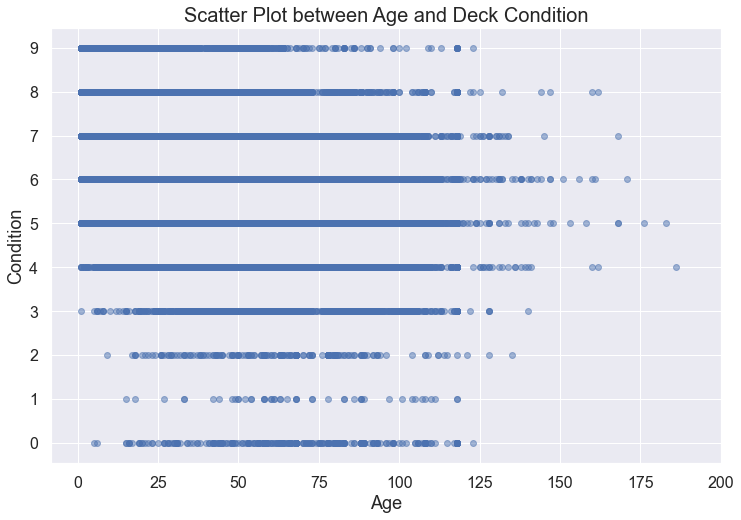

In [ ]:
df_sample = file_dict[2018].copy()

df_sample = df_sample[df_sample.Age > 0]
df_sample.drop_duplicates(subset=['STATE_CODE_001', 'STRUCTURE_NUMBER_008'], keep='first', inplace = True)

plt.figure(figsize=(12, 8))
x = df_sample.Age
y = df_sample.DECK_COND_058
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Condition', fontsize = 18)
plt.xticks(range(0,225,25), fontsize = 16)
plt.yticks(range(0,10), fontsize = 16)
plt.title('Scatter Plot between Age and Deck Condition', fontsize = 20)
plt.show()

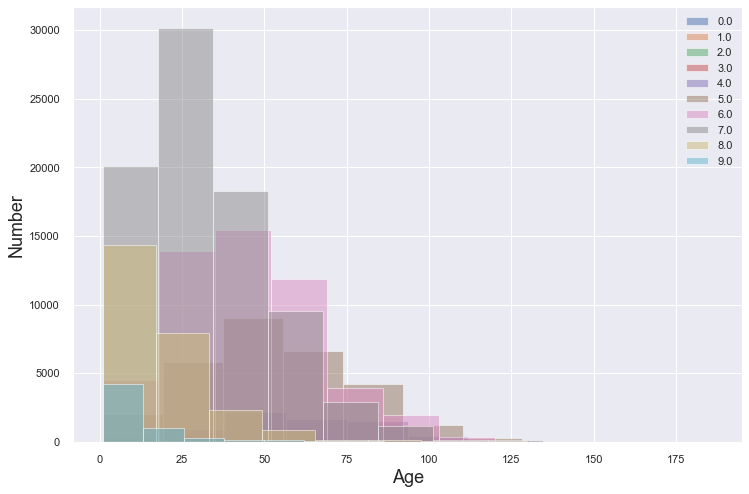

In [ ]:
sns.set()
# df_sample = file_dict[2018].copy()

# df_sample = df_sample[df_sample.Age > 0]
# df_sample.drop_duplicates(subset=['STATE_CODE_001', 'STRUCTURE_NUMBER_008'], keep='first', inplace = True)

plt.figure(figsize=(12, 8))
# x = df_sample.Age
# y = df_sample.DECK_COND_058

for ii in np.unique(df_sample.DECK_COND_058):
    plt.hist(df_sample.loc[df_sample.DECK_COND_058 == ii].Age, alpha=0.5, label=ii)


# yy = [df_sample.loc[df_sample.DECK_COND_058 == ii].Age for ii in np.unique(df_sample.DECK_COND_058)]
# plt.hist(yy)

# plt.boxplot(x, vert=0)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
# plt.xticks(range(0,225,25), fontsize = 16)
# plt.yticks(range(0,10), fontsize = 16)
# plt.title('Scatter Plot between Age and Deck Condition', fontsize = 20)
plt.legend()
plt.show()

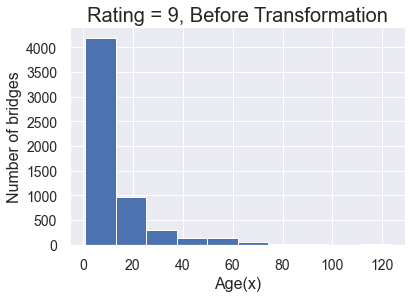

In [ ]:
plt.hist(df_sample.loc[df_sample.DECK_COND_058 == 9].Age)
plt.title("Rating = 9, Before Transformation", fontsize = 20)
plt.xlabel("Age(x)", fontsize=16)
plt.ylabel("Number of bridges", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

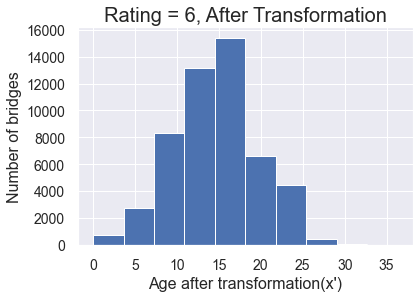

In [ ]:
x = df_sample.loc[df_sample.DECK_COND_058 == 6].Age
y, l = sp.stats.boxcox(x)
plt.hist(y)
plt.title("Rating = 6, After Transformation", fontsize = 20)
plt.xlabel("Age after transformation(x')", fontsize=16)
plt.ylabel("Number of bridges", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
l

0.6114474789890774

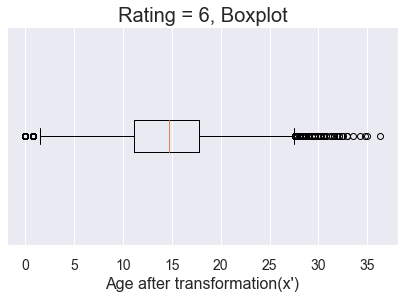

In [ ]:
plt.figure(figsize=(7,4))
plt.boxplot(y, vert = 0)
plt.title("Rating = 6, Boxplot", fontsize = 20)
plt.xlabel("Age after transformation(x')", fontsize=16)
plt.yticks(range(1))
plt.xticks(fontsize=14)
plt.show()

In [ ]:
idx_set = set()
for ii in range(1,10):
    temp = df_sample.loc[df_sample.DECK_COND_058.astype('int') == ii]
    if temp.shape[0] > 5:
        y, l = sp.stats.boxcox(temp.Age)
        Q1 = np.quantile(y, 0.25)
        Q3 = np.quantile(y, 0.75)
        IQR = Q3 - Q1
        indexNames = temp[ (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR)) ].index
        idx_set = idx_set.union(set(indexNames.values))

df_sample = df_sample.drop(idx_set).reset_index(drop = True)

plt.figure(figsize=(12, 8))
x = df_sample.Age
y = df_sample.DECK_COND_058
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Condition', fontsize = 18)
plt.xticks(range(0,225,25), fontsize = 16)
plt.yticks(range(0,10), fontsize = 16)
plt.title('Scatter Plot, After Outlier Removal', fontsize = 20)
plt.show()

In [ ]:
len(idx_set)